# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shimoda
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | naze
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | cambui
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | kahului
Processing Record 13 of Set 1 | trairi
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | khorixas
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | kisangani
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | busselton
Processing Re

Processing Record 37 of Set 4 | srednekolymsk
Processing Record 38 of Set 4 | shakiso
Processing Record 39 of Set 4 | novouzensk
Processing Record 40 of Set 4 | nata
Processing Record 41 of Set 4 | kesinga
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | baringo
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | kitoy
Processing Record 49 of Set 4 | kaka
Processing Record 0 of Set 5 | phuthaditjhaba
Processing Record 1 of Set 5 | castro
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | borger
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | tonantins
Processing Record 7 of Set 5 | peddapalli
Processing Record 8 of Set 5 | yurimaguas
Processing Record 9 of Set 5 | juazeiro
Processing Record 10 of Set 5 | narsaq
Proces

Processing Record 30 of Set 8 | asau
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | pontes e lacerda
Processing Record 33 of Set 8 | verkh-usugli
Processing Record 34 of Set 8 | jumla
Processing Record 35 of Set 8 | asyut
Processing Record 36 of Set 8 | stepnyak
Processing Record 37 of Set 8 | madaoua
Processing Record 38 of Set 8 | revelstoke
Processing Record 39 of Set 8 | vokhtoga
Processing Record 40 of Set 8 | dunda
Processing Record 41 of Set 8 | vanimo
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | markova
Processing Record 44 of Set 8 | bosaso
Processing Record 45 of Set 8 | fort-de-france
Processing Record 46 of Set 8 | takoradi
Processing Record 47 of Set 8 | port-gentil
Processing Record 48 of Set 8 | clinton
Processing Record 49 of Set 8 | morwell
Processing Record 0 of Set 9 | jasper
Processing Record 1 of Set 9 | orchard homes
Processing Record 2 of Set 9 | tomatlan
Processing Record 3 of Set 

Processing Record 17 of Set 12 | imst
Processing Record 18 of Set 12 | duz
City not found. Skipping...
Processing Record 19 of Set 12 | annamalainagar
Processing Record 20 of Set 12 | batemans bay
Processing Record 21 of Set 12 | namwala
Processing Record 22 of Set 12 | sommerda
Processing Record 23 of Set 12 | bilma
Processing Record 24 of Set 12 | tiksi
Processing Record 25 of Set 12 | vieux-habitants
Processing Record 26 of Set 12 | flin flon
Processing Record 27 of Set 12 | kroya
Processing Record 28 of Set 12 | pacific grove
Processing Record 29 of Set 12 | lahij
Processing Record 30 of Set 12 | coos bay
Processing Record 31 of Set 12 | maraa
Processing Record 32 of Set 12 | guarapari
Processing Record 33 of Set 12 | puerto del rosario
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | terrace
Processing Record 36 of Set 12 | mayumba
Processing Record 37 of Set 12 | yushan
Processing Record 38 of Set 12 | tandil
Processing Record 39 of Set 12 | pekin
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df["Date"] = pd.to_datetime(city_data_df["Date"],unit='s')
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shimoda,34.6667,138.9500,44.10,90,100,14.67,JP,1678008783
1,Faanui,-16.4833,-151.7500,81.55,79,99,11.68,PF,1678008784
2,Rikitea,-23.1203,-134.9692,79.65,75,100,14.85,PF,1678008784
3,Ushuaia,-54.8000,-68.3000,31.66,93,0,4.61,AR,1678008784
4,Pangnirtung,66.1451,-65.7125,31.73,81,100,12.95,CA,1678008784
...,...,...,...,...,...,...,...,...,...
553,Cockburn Town,21.4612,-71.1419,77.11,75,74,15.73,TC,1678008858
554,Russell,32.3502,-85.1999,54.68,93,0,0.00,US,1678008858
555,Orange Cove,36.6244,-119.3137,47.57,100,20,8.05,US,1678008858


In [5]:
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shimoda,34.6667,138.9500,44.10,90,100,14.67,JP,1678008783
1,Faanui,-16.4833,-151.7500,81.55,79,99,11.68,PF,1678008784
2,Rikitea,-23.1203,-134.9692,79.65,75,100,14.85,PF,1678008784
3,Ushuaia,-54.8000,-68.3000,31.66,93,0,4.61,AR,1678008784
4,Pangnirtung,66.1451,-65.7125,31.73,81,100,12.95,CA,1678008784


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shimoda,34.6667,138.9500,44.10,90,100,14.67,JP,1678008783
1,Faanui,-16.4833,-151.7500,81.55,79,99,11.68,PF,1678008784
2,Rikitea,-23.1203,-134.9692,79.65,75,100,14.85,PF,1678008784
3,Ushuaia,-54.8000,-68.3000,31.66,93,0,4.61,AR,1678008784
4,Pangnirtung,66.1451,-65.7125,31.73,81,100,12.95,CA,1678008784


In [7]:
import datetime as dt
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"],unit='s')
city_data_df["Date"] = city_data_df["Date"].dt.date
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shimoda,34.6667,138.9500,44.10,90,100,14.67,JP,2023-03-05
1,Faanui,-16.4833,-151.7500,81.55,79,99,11.68,PF,2023-03-05
2,Rikitea,-23.1203,-134.9692,79.65,75,100,14.85,PF,2023-03-05
3,Ushuaia,-54.8000,-68.3000,31.66,93,0,4.61,AR,2023-03-05
4,Pangnirtung,66.1451,-65.7125,31.73,81,100,12.95,CA,2023-03-05
...,...,...,...,...,...,...,...,...,...
553,Cockburn Town,21.4612,-71.1419,77.11,75,74,15.73,TC,2023-03-05
554,Russell,32.3502,-85.1999,54.68,93,0,0.00,US,2023-03-05
555,Orange Cove,36.6244,-119.3137,47.57,100,20,8.05,US,2023-03-05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

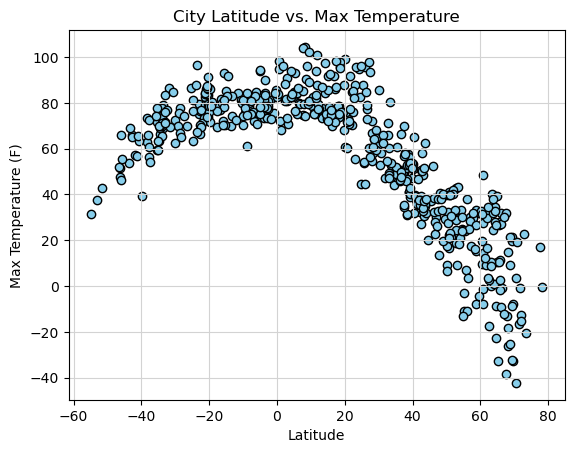

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

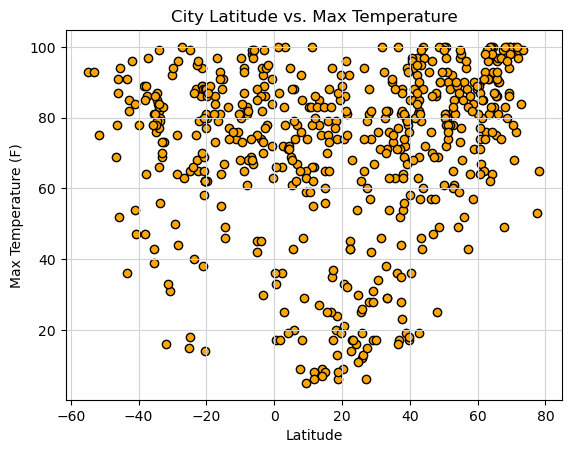

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

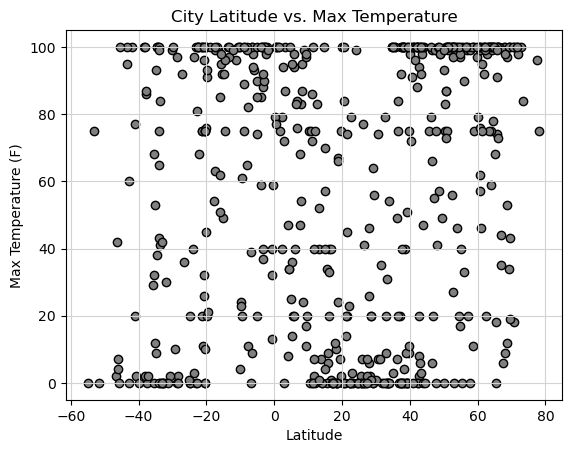

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="grey")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

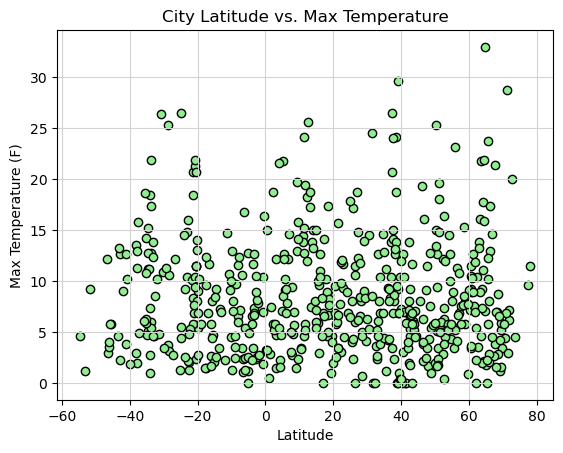

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shimoda,34.6667,138.9500,44.10,90,100,14.67,JP,2023-03-05
4,Pangnirtung,66.1451,-65.7125,31.73,81,100,12.95,CA,2023-03-05
5,Naze,28.3667,129.4833,58.12,57,2,8.03,JP,2023-03-05
6,Khatanga,71.9667,102.5000,-12.48,97,100,7.14,RU,2023-03-05
11,Kahului,20.8947,-156.4700,72.84,86,0,5.75,US,2023-03-05


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Faanui,-16.4833,-151.7500,81.55,79,99,11.68,PF,2023-03-05
2,Rikitea,-23.1203,-134.9692,79.65,75,100,14.85,PF,2023-03-05
3,Ushuaia,-54.8000,-68.3000,31.66,93,0,4.61,AR,2023-03-05
7,Avarua,-21.2078,-159.7750,82.45,89,75,18.41,CK,2023-03-05
8,Arraial Do Cabo,-22.9661,-42.0278,75.06,88,0,10.36,BR,2023-03-05


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.8027502203339298


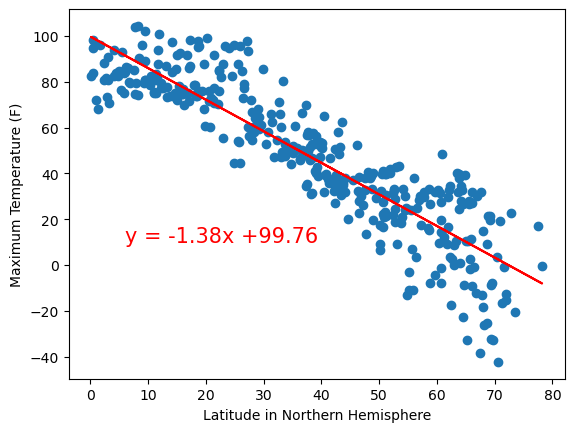

In [18]:
# Linear regression on Northern Hemisphere
regress_temp_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_temp_northern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Maximum Temperature (F)')

# Plot regression line
plt.annotate(regress_temp_northern_hemi,(6,10),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is : 0.4218839446284084


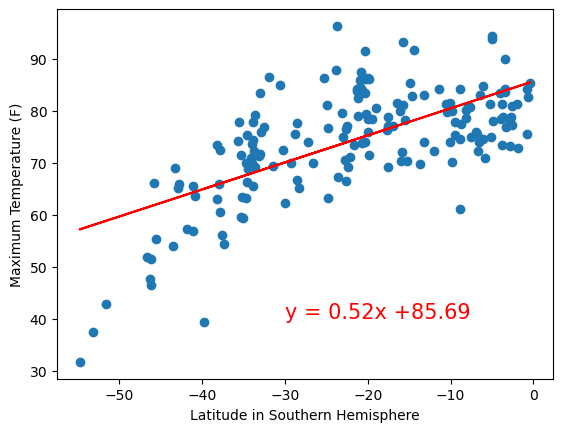

In [20]:
# Linear regression on Southern Hemisphere
regress_temp_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_temp_southern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Maximum Temperature (F)')

# Plot regression line
plt.annotate(regress_temp_southern_hemi,(-30,40),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is a clear negative correlation between temperature and latitude for cities in the northern hemisphere, with an r value of 0.8, so it would be fair to state that going into the northern hemisphere would be a good predictor of low temperature the further north one travels. There is a positive correlation for cities in the southern hemisphere, where max temperature increases as one gets closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.19135501236602803


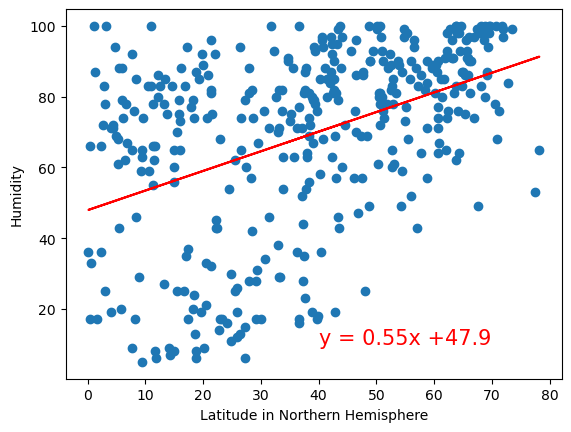

In [22]:
# Northern Hemisphere: Humidity
regress_humidity_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_humidity_northern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Humidity')

# Plot regression line
plt.annotate(regress_humidity_northern_hemi,(40,10),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is : 0.0039065642416674425


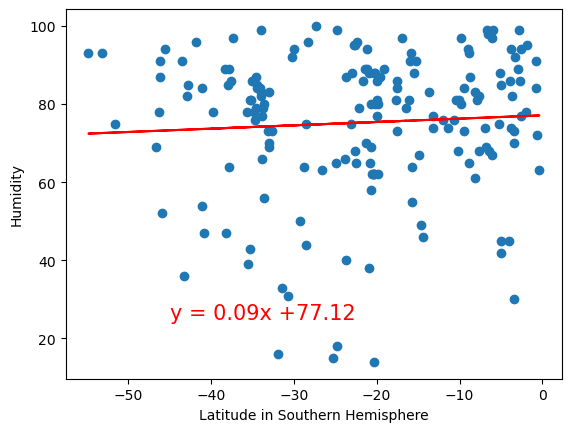

In [25]:
# Southern Hemisphere: Humidity
regress_humidity_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_humidity_southern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Humidity')

# Plot regression line
plt.annotate(regress_humidity_southern_hemi,(-45,25),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
In both the northern and southern hemisphere there is weak correlation with humidity and so it would not be beneficial to use as a predictive model. The r value for cities in the southern hemisphere is at 0 so this shows closer to no correlation, than a negative one.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.12490424527605762


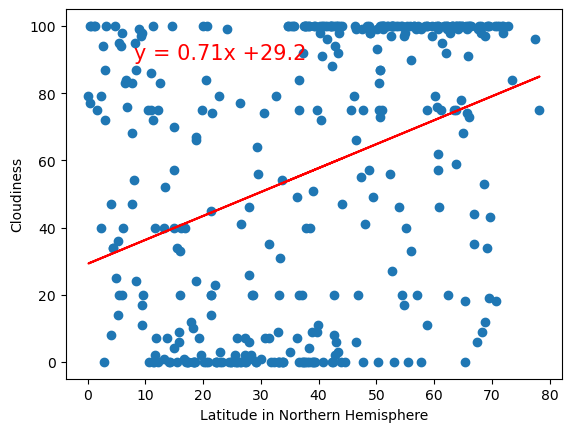

In [29]:
# Northern Hemisphere: Cloudiness
regress_cloudiness_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_cloudiness_northern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Cloudiness')

# Plot regression line
plt.annotate(regress_cloudiness_northern_hemi,(8,90),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is : 0.11417661732580328


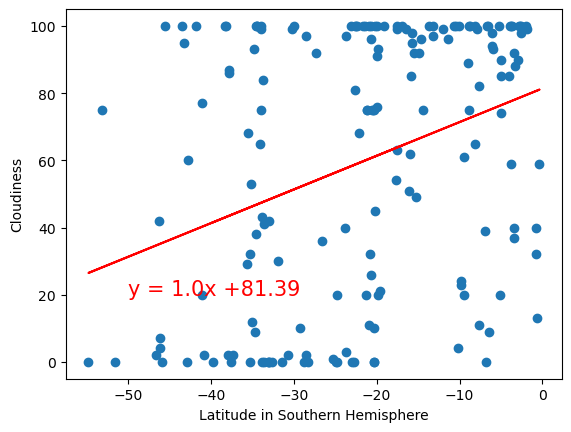

In [32]:
# Southern Hemisphere: Cloudiness
regress_cloudiness_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_cloudiness_southern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Cloudiness')

# Plot regression line
plt.annotate(regress_cloudiness_southern_hemi,(-50,20),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
With r values being 0.12 and 0.11 for northern and southern hemispheres respectively, and from the slope we can see there is a weak positive correlation between latitude and cloudiness for cities both in the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.0008355504005748113


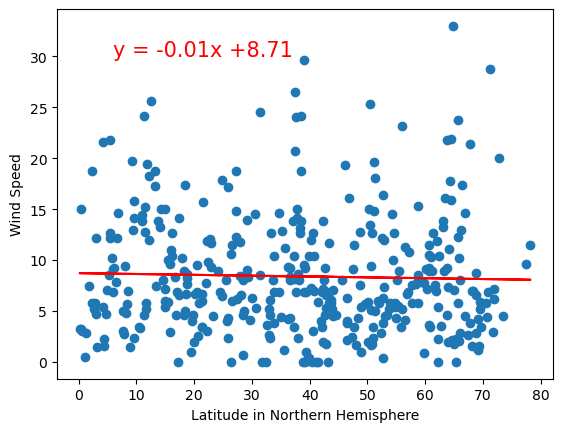

In [34]:
# Northern Hemisphere: Wind Speed
regress_wind_speed_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_wind_speed_northern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Northern Hemisphere')
plt.ylabel('Wind Speed')

# Plot regression line
plt.annotate(regress_wind_speed_northern_hemi,(6,30),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is : 0.015811288313563737


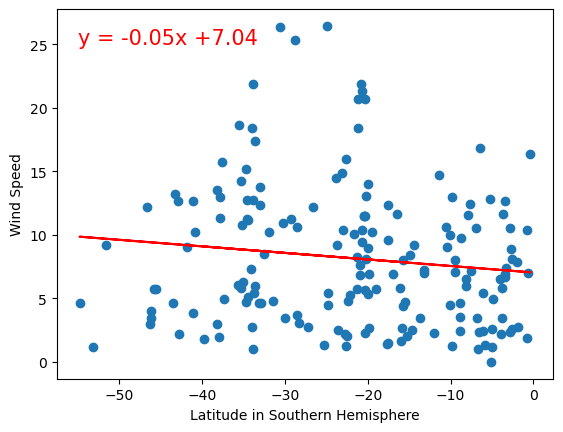

In [38]:
# Southern Hemisphere: Wind Speed
regress_wind_speed_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_wind_speed_southern_hemi

# Plot scatter plot
plt.xlabel('Latitude in Southern Hemisphere')
plt.ylabel('Wind Speed')

# Plot regression line
plt.annotate(regress_wind_speed_southern_hemi,(-55,25),fontsize=15,color="red")


# Show plot
plt.show()

**Discussion about the linear relationship:** 
With such low r values for wind speed versus northern and southern hemispheres, it would be fair to say there is little to no correlation between the two varaibles for the cities.